Lineer Regresyon ile Araba Fiyatı Tahmin Etme Uygulaması

Selin ÇABUK(191180026),
Mehmet Ali TONGA(201180758)

---------------

Gerekli kütüphanelerin import edilmesi.

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Veri setinin okunması.

In [3]:
cars_data = pd.read_csv('Cardetails.csv')

In [4]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Tork sütununun silinmesi.

In [5]:
cars_data.drop(columns=['torque'], inplace=True)

In [6]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


Veri ön işleme yapılmadan önceki veri ve sütun sayısı.

In [7]:
cars_data.shape

(8128, 12)

Boş sütunu olan veri kontrolü.

In [10]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

Boş sütunu olan verilerin silinmesi. 8128 veriden 7907 veriye düşer.

In [11]:
cars_data.dropna(inplace=True)

In [12]:
cars_data.shape

(7907, 12)

Tekrarlanan veri sayısını hesaplama.

In [14]:
cars_data.duplicated().sum()

1189

Tekrarlanan verilerin silinmesi. 7907 veriden 6718 veriye düşer.

In [15]:
cars_data.drop_duplicates(inplace=True)

In [16]:
cars_data.shape

(6718, 12)

Verisetinden boş verilerin ve tekrarlanan verilerin silinmesi ön işlemlerinin ardından son hali.

In [17]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


Sütunların data tipleri.

In [18]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


DATA ANALİZİ

In [19]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

Marka ve model aynı sütunda yazıldığı için sadece markayı çekmek amacıyla kullanılan "get_brand_name" fonksiyonu.

In [20]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [110]:
get_brand_name('Maruti Swift Dzire VDI')
get_brand_name('Mehmet Ali TONGA') #Markayı döndermek amacıyla ilk kelimeyi döndürür.

'Mehmet'

Aralarında boşluk bulunan datalardan boşluğu kaldırmak amacıyla kullanılan "clean_data" fonksiyonu.

In [21]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

"name" datasına "get_brand_name" fonksiyonu uygulanarak, sadece markaların kalmasının sağlanması.

In [23]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [24]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

"mileage", "max_power" ve "engine" datalarına boşluklardan kurtulmak amacıyla "clean_data" fonksiyonunun uygulanması.

In [25]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)

In [26]:
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)

In [27]:
cars_data['engine'] = cars_data['engine'].apply(clean_data)

Yapılan ön işleme adımlarından sonra unique dataların sıralanması.

In [28]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  10250

"name" datasını int türüne çevirmek amacıyla her bir elemanının numaralandırılması.

In [29]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

"transmission" datasını int türüne çevirmek amacıyla her bir elemanının numaralandırılması.

In [30]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [31]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

"seller_type" datasını int türüne çevirmek amacıyla her bir elemanının numaralandırılması.

In [32]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [33]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

"fuel" datasını int türüne çevirmek amacıyla her bir elemanının numaralandırılması.

In [35]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [36]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

"owner" datasını int türüne çevirmek amacıyla her bir elemanının numaralandırılması.

In [40]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [41]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

In [111]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   int64  
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 629.9 KB


Silinen veriler olduğu için index numaralarının yeniden dağıtılması.

In [112]:
cars_data.reset_index(inplace=True)

In [113]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,6713,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,6714,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,6715,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,6716,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


Index sütununun kaldırılması.

In [42]:
cars_data.drop(columns=['index'], inplace=True)

Verisetinde mevcut olan araçların üretim yıllarının sıralanması.

In [68]:
unique_km_values = cars_data["year"].unique()
sorted_km_values = sorted(unique_km_values)
print(sorted_km_values)

[1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


En yüksek KM bulmak için KM'lerin sıralanması.

In [43]:
unique_km_values = cars_data["km_driven"].unique()
sorted_km_values = sorted(unique_km_values)
print(sorted_km_values)

[1, 1000, 1300, 1303, 1500, 1600, 1620, 2000, 2118, 2136, 2286, 2300, 2350, 2388, 2560, 2600, 2700, 2789, 2860, 3000, 3010, 3100, 3177, 3500, 3564, 4000, 4295, 4300, 4337, 4500, 4701, 4773, 4875, 5000, 5200, 5229, 5400, 5500, 5621, 5800, 6000, 6001, 6200, 6500, 6544, 6550, 6750, 6757, 6825, 7000, 7032, 7200, 7300, 7400, 7500, 7600, 7672, 7673, 7720, 7800, 7949, 7967, 7976, 8000, 8079, 8500, 8576, 8588, 8600, 9000, 9200, 9400, 9500, 9599, 9654, 9656, 9750, 9850, 9900, 10000, 10200, 10300, 10500, 10800, 11000, 11500, 11533, 11688, 12000, 12500, 12584, 12700, 12800, 13000, 13120, 13500, 13534, 13663, 13887, 14000, 14200, 14317, 14495, 14548, 14700, 15000, 15151, 15200, 15381, 15500, 15732, 15780, 15858, 16000, 16034, 16151, 16200, 16500, 16589, 16700, 16830, 17000, 17100, 17500, 17601, 18000, 18300, 18484, 18500, 18816, 18890, 18945, 19000, 19100, 19500, 19600, 19700, 19723, 19800, 20000, 20102, 20171, 20375, 20706, 21000, 21147, 21446, 21500, 21871, 21900, 22000, 22053, 22200, 22500, 225

Verisetindeki bütün unique değerlerin yazdırılması.

In [44]:
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000 

Boş sütunu olan veri var mı diye kontrol edilmesi.

In [45]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

"selling_price" verisi tahmin edileceği için "output_data" olarak değiştirilmesi.

In [46]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

Veriyi eğitim ve test setlerine bölme (%80-%20)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

Model oluşturma.

In [48]:
model = LinearRegression()

Model eğitimi.

In [49]:
model.fit(x_train, y_train)

LinearRegression()

In [50]:
predict = model.predict(x_test)

In [51]:
predict

array([279203.76920363, 670253.54720193, 158358.29755186, ...,
       378173.78980736, 431930.95584415, 510237.16588724])

In [52]:
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

Başarı metrikleri.

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

In [67]:
print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Training R^2: {r2_train}')
print(f'Test R^2: {r2_test}')

Training MSE: 110712290364.66003
Test MSE: 82417302468.8053
Training R^2: 0.6125656161884323
Test R^2: 0.6370303292214847


Eğitim ve test setleri için veri çerçeveleri oluşturma.

In [54]:
train_results = pd.DataFrame({'Gerçek Değerler': y_train, 'Tahmin Edilen Değerler': y_train_pred})
test_results = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

Çizim için gerekli olan kütüphaneleri import etme.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

Verisetindeki araçların yıllarının ve fiyatlarının dağılımları.

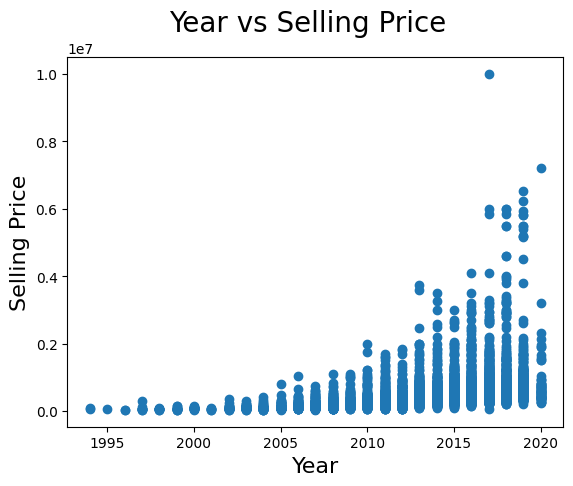

In [107]:
fig = plt.figure()
plt.scatter(cars_data['year'],cars_data['selling_price'])
fig.suptitle('Year vs Selling Price', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Selling Price', fontsize=16)

plt.show()

Verisetindeki araçların yıllarının ve kilometrelerinin dağılımları.

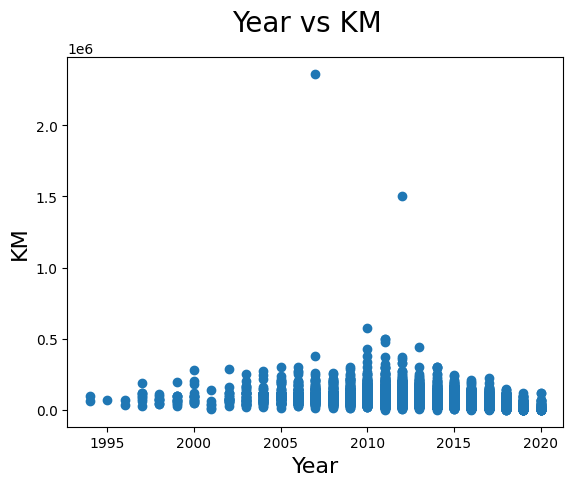

In [105]:
fig = plt.figure()
plt.scatter(cars_data['year'],cars_data['km_driven'])
fig.suptitle('Year vs KM', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('KM', fontsize=16)

plt.show()

Yayılımı anlamak için y_test ve y_pred grafiğinin çizilmesi.

Text(0, 0.5, 'y_pred')

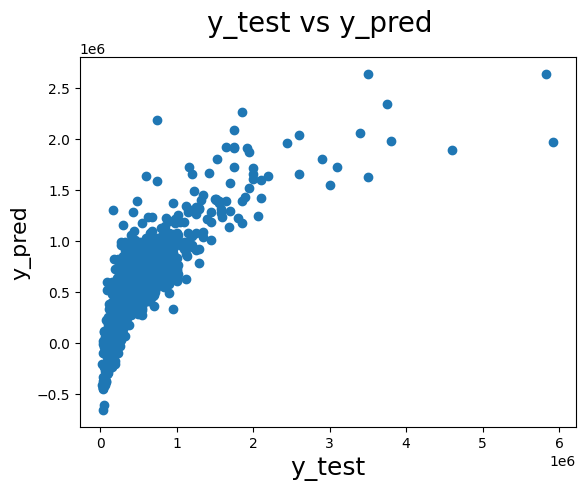

In [80]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

Lineer regresyon çizimi.

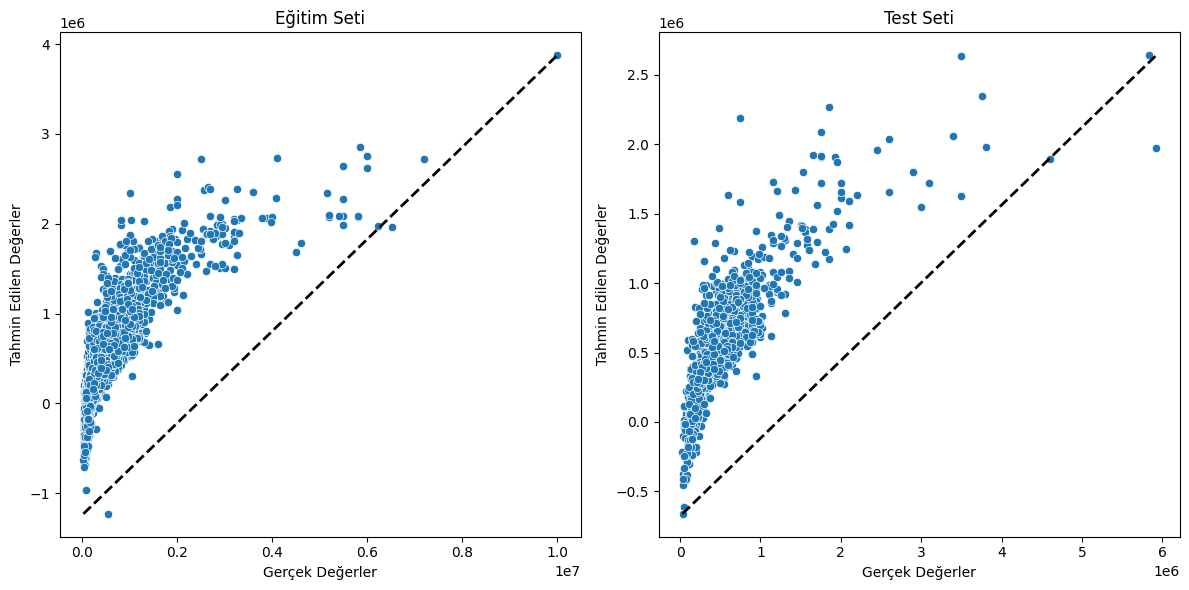

In [109]:
plt.figure(figsize=(12, 6))

# Eğitim seti grafiği
plt.subplot(1, 2, 1)
sns.scatterplot(x=train_results['Gerçek Değerler'], y=train_results['Tahmin Edilen Değerler'])
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], 'k--', lw=2)
plt.title('Eğitim Seti')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Test seti grafiği
plt.subplot(1, 2, 2)
sns.scatterplot(x=test_results['Gerçek Değerler'], y=test_results['Tahmin Edilen Değerler'])
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.title('Test Seti')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

plt.tight_layout()
plt.show()

Modele tahmin için gönderilecek test verisinin tanımlanması.

In [56]:
input_data_model = pd.DataFrame(
    [[5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [57]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0


In [58]:
model.predict(input_data_model)

array([990515.87392303])

Model kaydetme.

In [59]:
import pickle as pk

In [60]:
pk.dump(model,open('model.pkl','wb'))